In [2]:
!pip install ultralytics
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define paths for input images and output labels
base_path = "/kaggle/input/deep-fake-dataset/images" #/content/drive/MyDrive/RP/DeepFakeDatasetResearch/images
output_labels_path = "/kaggle/working/output/labels" #/content/drive/MyDrive/RP/DeepFakeDatasetResearch/labels

# Folders to process
folders = ["train", "valid", "test"]
categories = {"Real": 0, "Fake": 1}

# Create output directories for labels
for folder in folders:
    os.makedirs(os.path.join(output_labels_path, folder), exist_ok=True)

# Function to generate labels
def generate_labels():
    for folder in folders:
        for category, label in categories.items():
            input_folder = os.path.join(base_path, folder, category)
            output_folder = os.path.join(output_labels_path, folder)

            if not os.path.exists(input_folder):
                print(f"Skipping {input_folder}, not found.")
                continue

            # Process each image
            for image_file in os.listdir(input_folder):
                if image_file.endswith((".jpg", ".png", ".jpeg")):  # Add extensions as needed
                    image_name = os.path.splitext(image_file)[0]
                    label_file_path = os.path.join(output_folder, f"{image_name}.txt")

                    # Write label to file
                    with open(label_file_path, "w") as label_file:
                        label_file.write(f"{label}\n")

# Run label generation
generate_labels()

print(f"Labels generated and saved in {output_labels_path}")


Labels generated and saved in /kaggle/working/output/labels


In [ ]:
import shutil

# Compress the labels folder into a zip file for download
shutil.make_archive('/content/drive/MyDrive/RP/output/labels', 'zip', '/content/drive/MyDrive/RP/DeepFakeDatasetResearch/labels')

print("Labels folder compressed. You can download the file 'labels.zip' from the Kaggle output directory.")


Labels folder compressed. You can download the file 'labels.zip' from the Kaggle output directory.


In [ ]:
from IPython.display import FileLink
FileLink(r'labels.zip')

In [ ]:
Model Overview

# **Model Overview**

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*PTE5X9iUJz2n6nFqhesZ1A.png)

![](https://miro.medium.com/v2/resize:fit:582/format:webp/1*yeBYHC7kYBgbNHk9q87IYg.jpeg)

In [ ]:
# Import necessary libraries
from ultralytics import YOLO

# Load the YOLOv8 classification model
model = YOLO('yolov8n-cls.pt')

# Train the model with the desired settings
model.train(data='/kaggle/input/datafake', epochs=100, batch=16, imgsz=640,
               optimizer='Adam', lr0=0.0001,
               save=True, project='runs/train', name='exp', exist_ok=True)


Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/datafake, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=exp, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /kaggle/input/datafake/train... 4206 images, 0 corrupt: 100%|██████████| 4206/4206 [00:07<00:00, 587.99it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/datafake is not writeable, cache not saved.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/datafake/val... 400 images, 0 corrupt: 100%|██████████| 400/400 [00:00<00:00, 469.42it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/datafake is not writeable, cache not saved.


optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/train/exp
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.91G     0.7083         16        640:   3%|▎         | 7/263 [00:02<00:42,  5.96it/s]

      1/100      1.91G     0.6979         16        640:   4%|▍         | 10/263 [00:02<00:44,  5.65it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]
      1/100      1.91G     0.6054         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.23it/s]

                   all      0.675          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.65G     0.4452         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all      0.815          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.65G     0.3631         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.93it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.68G     0.3275         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.68G     0.3049         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.67G     0.2783         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.50it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.65G     0.2594         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.93it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.68G     0.2475         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.16it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.68G     0.2483         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.07it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.67G      0.239         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.65G      0.218         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.68G     0.2124         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.27it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.68G     0.1992         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.67G     0.1884         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.12it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.65G     0.1889         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.17it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.68G     0.1794         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.90it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.68G     0.1787         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.12it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.67G     0.1664         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.72it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.65G     0.1759         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.17it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      1.68G     0.1556         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.36it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.68G     0.1523         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.25it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      1.67G     0.1532         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      1.65G      0.155         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.29it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      1.68G     0.1386         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.09it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.68G     0.1354         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.02it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.67G     0.1289         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.65G     0.1474         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      1.68G      0.124         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.31it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      1.68G     0.1267         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      1.67G     0.1265         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      1.65G     0.1255         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.29it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      1.68G      0.124         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.16it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      1.68G     0.1176         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.31it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      1.67G     0.1146         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      1.65G     0.1149         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.23it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      1.68G     0.1119         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  6.69it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      1.68G     0.1174         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.23it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      1.67G     0.1017         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.31it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      1.65G    0.09543         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.11it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      1.68G     0.1032         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.18it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      1.68G     0.1022         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.52it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      1.67G    0.09961         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.52it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      1.65G      0.096         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      1.68G     0.1073         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      1.68G    0.09456         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.83it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      1.67G    0.09872         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.28it/s]

                   all      0.873          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      1.65G    0.09749         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      1.68G    0.08968         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.03it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      1.68G    0.09261         14        640: 100%|██████████| 263/263 [01:12<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.34it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      1.67G    0.09564         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.24it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      1.65G    0.08739         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.56it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      1.68G    0.08351         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.14it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      1.68G    0.08081         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.83it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      1.67G     0.0928         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      1.65G    0.08226         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.86it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      1.68G    0.08375         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.85it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      1.68G    0.08532         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.26it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      1.67G    0.08202         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      1.65G     0.0802         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.07it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      1.68G    0.07308         14        640: 100%|██████████| 263/263 [01:12<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.43it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      1.68G    0.07416         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.84it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      1.67G    0.08766         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.44it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      1.65G    0.07502         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.89it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      1.68G    0.07946         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.79it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      1.68G    0.08468         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.68it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      1.67G    0.08146         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      1.65G    0.07976         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.00it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      1.68G    0.07351         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.27it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      1.68G    0.06991         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.27it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      1.67G    0.07238         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.73it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      1.65G    0.07383         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.32it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      1.68G    0.07739         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.03it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      1.68G    0.06988         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.28it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      1.67G    0.06953         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.57it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      1.65G    0.07455         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.45it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      1.68G    0.07327         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      1.68G     0.0695         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.11it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      1.67G    0.07126         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      1.65G    0.07136         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.38it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      1.68G    0.07212         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.78it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      1.68G    0.07575         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.95it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      1.67G    0.06989         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.23it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      1.65G    0.06578         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  4.96it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      1.68G    0.07633         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.92it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      1.68G    0.07149         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.00it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      1.67G    0.07033         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.76it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      1.65G    0.06839         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.87it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      1.68G     0.0701         14        640: 100%|██████████| 263/263 [01:11<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      1.68G     0.0688         14        640: 100%|██████████| 263/263 [01:10<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.86it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      1.67G    0.06478         14        640: 100%|██████████| 263/263 [01:09<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.42it/s]

                   all      0.865          1



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


     91/100      1.65G    0.06711         14        640: 100%|██████████| 263/263 [01:08<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.29it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      1.68G    0.05807         14        640: 100%|██████████| 263/263 [01:06<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.22it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      1.68G     0.0689         14        640: 100%|██████████| 263/263 [01:07<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.40it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      1.67G    0.05869         14        640: 100%|██████████| 263/263 [01:07<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.41it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      1.65G    0.06834         14        640: 100%|██████████| 263/263 [01:07<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.85it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      1.68G    0.06119         14        640: 100%|██████████| 263/263 [01:06<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.60it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      1.68G    0.06296         14        640: 100%|██████████| 263/263 [01:07<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.93it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      1.67G    0.06057         14        640: 100%|██████████| 263/263 [01:07<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      1.65G    0.07344         14        640: 100%|██████████| 263/263 [01:06<00:00,  3.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.30it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      1.68G    0.05904         14        640: 100%|██████████| 263/263 [01:06<00:00,  3.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.09it/s]

                   all      0.865          1



100 epochs completed in 2.034 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 3.0MB
Optimizer stripped from runs/train/exp/weights/best.pt, 3.0MB

Validating runs/train/exp/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/datafake/train... found 4206 images in 2 classes ✅ 
val: /kaggle/input/datafake/val... found 400 images in 2 classes ✅ 
test: /kaggle/input/datafake/test... found 200 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.38it/s]


                   all      0.875          1
Speed: 0.6ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/train/exp


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9ee0198400>
curves: []
curves_results: []
fitness: 0.9375
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.875, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9375}
save_dir: PosixPath('runs/train/exp')
speed: {'preprocess': 0.5927062034606934, 'inference': 1.4352178573608398, 'loss': 0.0007915496826171875, 'postprocess': 0.000807642936706543}
task: 'classify'
top1: 0.875
top5: 1.0

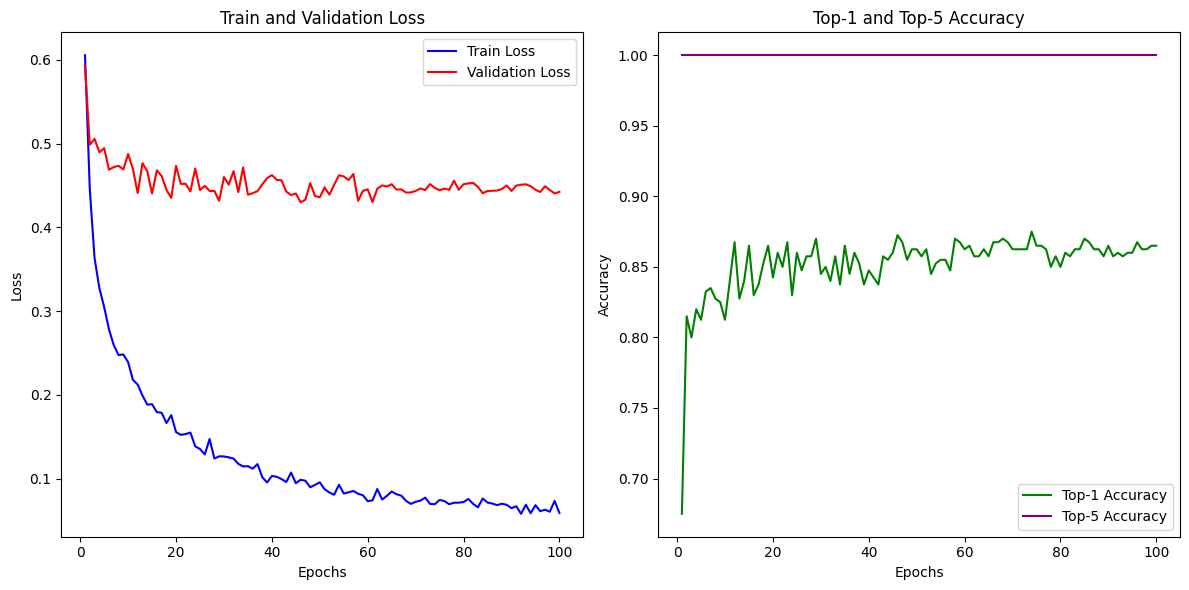

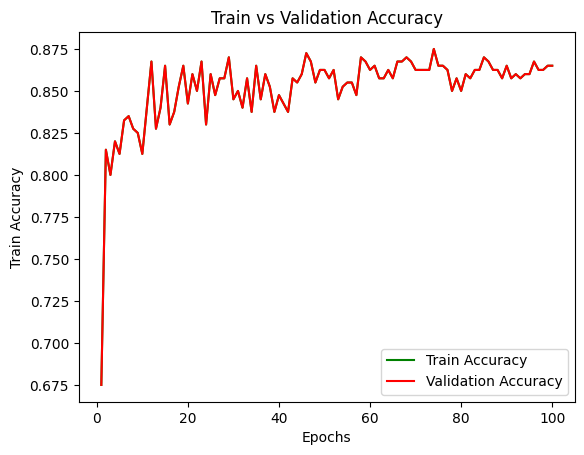

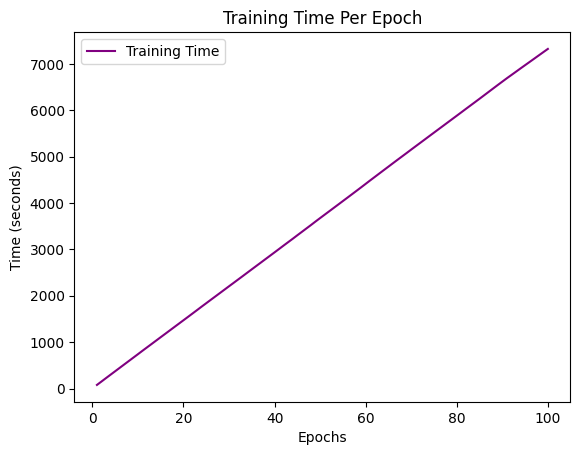

<Figure size 640x480 with 0 Axes>

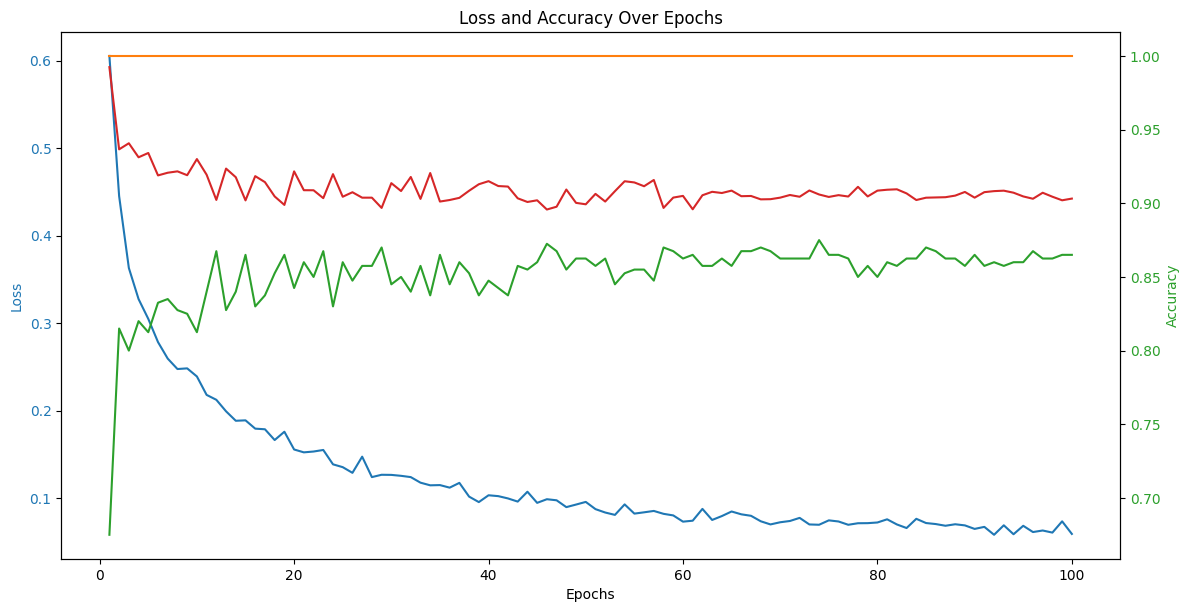

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/RP/output/results.csv')

# Extract the relevant columns
epochs = df['epoch']
train_loss = df['train/loss']
val_loss = df['val/loss']
accuracy_top1 = df['metrics/accuracy_top1']
accuracy_top5 = df['metrics/accuracy_top5']

# Plotting Losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/RP/plots/train_validation_loss.png')

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_top1, label='Top-1 Accuracy', color='green')
plt.plot(epochs, accuracy_top5, label='Top-5 Accuracy', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Top-1 and Top-5 Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/RP/plots/t1_t5_accuracy.png')

# Display the plots
plt.tight_layout()
plt.show()

train_accuracy = df['metrics/accuracy_top1']
val_accuracy = df['metrics/accuracy_top1']

plt.plot(epochs, train_accuracy, label='Train Accuracy', color='green')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/RP/plots/train_validation_accuracy.png')

plt.plot(epochs, df['time'], label='Training Time', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.title('Training Time Per Epoch')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/RP/plots/train_time.png')

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(epochs, train_loss, label='Train Loss', color='tab:blue')
ax1.plot(epochs, val_loss, label='Validation Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.plot(epochs, accuracy_top1, label='Top-1 Accuracy', color='tab:green')
ax2.plot(epochs, accuracy_top5, label='Top-5 Accuracy', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Loss and Accuracy Over Epochs')
plt.show()
plt.savefig('/content/drive/MyDrive/RP/plots/loss_accuracy_over_time.png')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/RP/pt/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.names

{0: 'Fake', 1: 'Real'}

In [ ]:
# # Access prediction probabilities
# probs = results[0].probs  # Extract probabilities for the first image in the batch
# print(probs)
# # Get the class with the highest probability
# predicted_class_id = probs.top1  # Class ID with the highest probability
# confidence = probs.data[predicted_class_id]  # Extract numerical confidence score
# label = model.names[predicted_class_id]  # Get the class label

# print(f"Predicted Class: {label}, Class ID: {predicted_class_id}, Confidence: {confidence:.2f}")

In [ ]:
for i, prob in enumerate(probs.data):
    print(f"Class {i} ({model.names[i]}): {prob:.2f}")

Class 0 (Fake): 1.00
Class 1 (Real): 0.00


In [ ]:
import os

# Define the dataset directory paths
train_dir = '/content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/train'
val_dir = '/content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/val'

def count_files_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count training and validation data
train_counts = count_files_in_classes(train_dir)
val_counts = count_files_in_classes(val_dir)

print("Training Set Class Distribution:", train_counts)
print("Validation Set Class Distribution:", val_counts)


Training Set Class Distribution: {'Fake': 2100, 'Real': 2106}
Validation Set Class Distribution: {'Fake': 198, 'Real': 202}


In [ ]:
#testing

In [ ]:
from pathlib import Path
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define the test directory
test_dir = Path("/content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/test")
classes = ["Fake", "Real"]

# Prepare test images and true labels
test_images = []
true_labels = []

for class_index, class_name in enumerate(classes):
    class_path = test_dir / class_name
    for img_path in class_path.glob("*.jpg"):
        test_images.append(str(img_path))
        true_labels.append(class_index)


In [ ]:
# Iterate over the test images
predicted_labels = []

for img_path in test_images:
    results = model(img_path)  # Run inference

    # Access prediction probabilities (assumes probs is available directly)
    probs = results[0].probs  # Extract probabilities for the first image in the batch

    # Get the class with the highest probability
    predicted_class_id = probs.top1  # Class ID with the highest probability
    confidence = probs.data[predicted_class_id]  # Extract numerical confidence score

    # Get the class label from the model names
    label = model.names[predicted_class_id]  # Get the class label

    # Print predicted class, ID, and confidence
    # print(f"Predicted Class: {label}, Class ID: {predicted_class_id}, Confidence: {confidence:.2f}")

    # Append the predicted class id for metrics
    predicted_labels.append(predicted_class_id)



image 1/1 /content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/test/Fake/fake_914_jpg.rf.9e99731c6695633ea7f78d525ace62c0.jpg: 640x640 Fake 0.65, Real 0.35, 222.9ms
Speed: 66.1ms preprocess, 222.9ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/test/Fake/fake_773_jpg.rf.f1adc84261f4f0bd395b675f03c39039.jpg: 640x640 Fake 1.00, Real 0.00, 86.0ms
Speed: 11.7ms preprocess, 86.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/test/Fake/fake_895_jpg.rf.1ec176933063cf8f8906946db933bb71.jpg: 640x640 Fake 1.00, Real 0.00, 86.0ms
Speed: 14.8ms preprocess, 86.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/test/Fake/fake_9_jpg.rf.4770fbb8c17f1af9f5364007e5e8deba.jpg: 640x640 Real 1.00, Fake 0.00, 87.4ms
Speed: 15.9ms preprocess, 87.4

In [ ]:
# Calculate metrics
report = classification_report(true_labels, predicted_labels, target_names=classes)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the metrics
print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.72      0.83       103
        Real       0.77      0.98      0.86        97

    accuracy                           0.84       200
   macro avg       0.87      0.85      0.84       200
weighted avg       0.87      0.84      0.84       200

Confusion Matrix:
[[74 29]
 [ 2 95]]


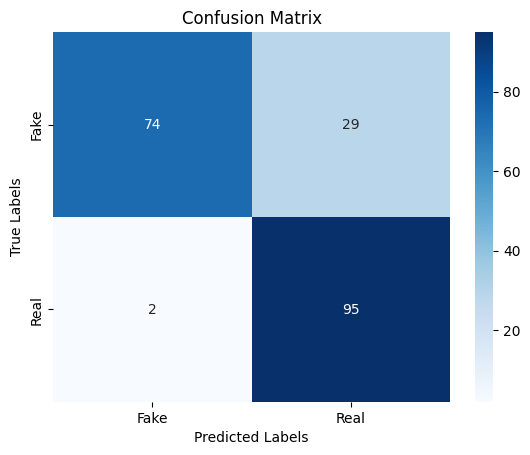

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('/content/drive/MyDrive/RP/plots/confusion_matrix.png')


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/RP/pt/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.names

{0: 'Fake', 1: 'Real'}

In [ ]:
#test with a video

In [ ]:
import cv2
import numpy as np
import torch

# Load the YOLOv8 model (you should have already done this)
# Example: model = YOLO('path_to_your_model')

# Path to your video
# video_path = '/content/drive/MyDrive/RP/TestVideos/aassnaulhq.mp4' #real
# video_path = '/content/drive/MyDrive/RP/TestVideos/kmcdjxmnoa.mp4' #real
# video_path = '/content/drive/MyDrive/RP/TestVideos/ajiyrjfyzp-1.mp4' #fake
video_path = '/content/drive/MyDrive/RP/TestVideos/alrtntfxtd.mp4' #fake


# Open the video using OpenCV
cap = cv2.VideoCapture(video_path)

# Get video frame size and fps for saving the output
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Set up the video writer to save the output video
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

real_frames = 0
fake_frames = 0

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Convert frame to RGB as YOLO expects RGB images (if necessary)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference on the current frame
    results = model(frame_rgb)  # Run inference

    # Get the prediction probabilities for the first image in the batch
    probs = results[0].probs  # Extract probabilities for the first image

    # Get the predicted class ID with the highest probability
    predicted_class_id = probs.top1  # Class ID with the highest probability
    confidence = probs.data[predicted_class_id]  # Confidence score for the prediction

    # Get the class label
    label = model.names[predicted_class_id]

    if label == model.names[0]:
      fake_frames += 1
    elif label == model.names[1]:
      real_frames += 1

    # Print the prediction output for the current frame
    print(f"Predicted Class: {label}, Confidence: {confidence:.2f}")

    # Optionally, display the frame with the prediction label
    cv2.putText(frame, f'{label}: {confidence:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Write the frame with predictions to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()

# No need to call cv2.destroyAllWindows() in headless environments
# cv2.destroyAllWindows()

total_frames = real_frames + fake_frames

# Avoid division by zero
if total_frames > 0:
    real_probability = real_frames / total_frames
    fake_probability = fake_frames / total_frames
else:
    real_probability = 0
    fake_probability = 0

# Print the results
print(f"\nReal Frames: {real_frames}, Fake Frames: {fake_frames}")
print(f"Real Probability: {real_probability:.2%}, Fake Probability: {fake_probability:.2%}")


print("Video processing complete. Output saved as 'output_video.avi'.")



0: 640x640 Fake 0.53, Real 0.47, 177.0ms
Speed: 38.4ms preprocess, 177.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Fake, Confidence: 0.53

0: 640x640 Fake 0.73, Real 0.27, 168.5ms
Speed: 28.3ms preprocess, 168.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Fake, Confidence: 0.73

0: 640x640 Real 0.79, Fake 0.21, 162.1ms
Speed: 30.9ms preprocess, 162.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 0.79

0: 640x640 Real 0.85, Fake 0.15, 139.0ms
Speed: 27.5ms preprocess, 139.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 0.85

0: 640x640 Real 0.92, Fake 0.08, 147.9ms
Speed: 29.1ms preprocess, 147.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted Class: Real, Confidence: 0.92

0: 640x640 Real 0.74, Fake 0.26, 164.8ms
Speed: 28.2ms preprocess, 164.8ms inference, 0.1ms po

In [ ]:
import os

# Define the dataset directory paths
train_dir = '/content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/train'
val_dir = '/content/drive/MyDrive/RP/DeepFakeDatasetResearch/images/val'

def count_files_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count training and validation data
train_counts = count_files_in_classes(train_dir)
val_counts = count_files_in_classes(val_dir)

print("Training Set Class Distribution:", train_counts)
print("Validation Set Class Distribution:", val_counts)

Training Set Class Distribution: {'Fake': 2100, 'Real': 2106}
Validation Set Class Distribution: {'Fake': 198, 'Real': 202}
